<a href="https://colab.research.google.com/github/geneweb/geneweb/blob/master/geneweb_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Live test GeneWeb 7.x exp



##Upload your Geneweb database


The file must be in **.gw format** at the root on your current Colab session. Use the Colab file import button (folder icon one on left) to import it.
Note that this Colab is a personnal temporary server and that everything including the imported database will be deleted if you stop to use it. It serves only for testing purpose.

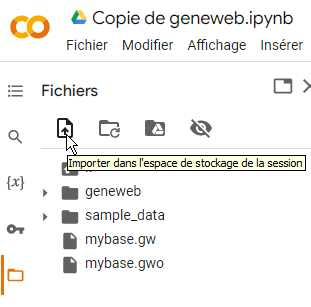

In [1]:
#@markdown #Type your database file name
#@markdown You need to fill the **basefile** input according to the database file you have uploaded.
basefile = 'mybase.gw' #@param {type:"string"}

#@markdown Then execute all cells one by one with “>” button, including this one, or press Ctrl+F9 to execute them all.

##Building Ocaml with Opam




In [ ]:
#Installing Ocaml environnement needed to build Geneweb (takes 10 min, be patient!)
!apt install opam libgmp-dev xdot
!opam -y init --bare --shell-setup
!opam switch create 4.13.1
!eval $(opam env --switch=4.13.1)
!opam install -y calendars.1.0.0 camlp-streams camlp5 camlzip cppo digestive dune jingoo markup oUnit ppx_blob ppx_deriving ppx_import stdlib-shims syslog unidecode.0.2.0 uri uucp uutf uunf yojson

In [ ]:
#[OPTIONAL] Verify installed versions of Ocaml and Opam versions, list Opam dependencies
!opam exec -- ocaml --version
!opam exec -- opam --version
!opam list

## Clone and build GeneWeb

In [ ]:
#Clone GeneWeb, checkout selected branch
!git clone https://github.com/geneweb/geneweb
!cd geneweb && opam exec -- ocaml ./configure.ml && DUNE_PROFILE=release opam exec -- make distrib

In [ ]:
#Import your Geneweb database. Log file stored in /bases/ if needed.
!cd geneweb/distribution/bases/ && ../gw/gwc -f ../../../$basefile -o mybase -stats -cg > import.log && ../gw/update_nldb mybase

## Lauch Geneweb server

In [ ]:
# Show the URL of Geneweb server on this Colab environnement. Don’t click before the gwd server is launched (next step).
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(2317)"))

In [ ]:
# Launch Geneweb server and clic on previous given Colab URL https://2317….prod.colab.dev/ to test your database in live!
!cd geneweb/distribution/ && gw/gwd -blang -log "<stderr>"